# Wärmeleitungsgleichung in 1D

## Initialisierung

In [1]:
import numpy as np
import matplotlib.pyplot as pl

## Heat Kernel

In [2]:
def f (a, t, x):
    ivat = 4 * a * t
    numer = np.exp (- x ** 2 / ivat)
    denom = np.sqrt (np.pi * ivat)
    return numer / denom

## Verschiedene Heat Kernel zeichnen

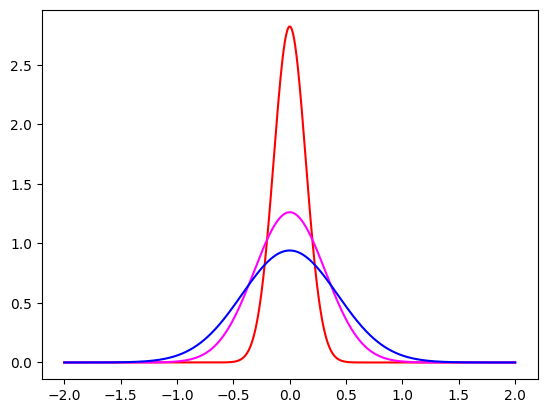

In [3]:
a = 1
t1 = 0.01
t2 = 0.05
t3 = 0.09

x = np.linspace (-2, 2, 1001)
y1 = np.array ([f (a, t1, xi) for xi in x])
y2 = np.array ([f (a, t2, xi) for xi in x])
y3 = np.array ([f (a, t3, xi) for xi in x])

pl.plot (x, y1, color = 'red')
pl.plot (x, y2, color = 'magenta')
pl.plot (x, y3, color = 'blue')
pl.show()

## Heat Kernel zweimal ableiten (Laplace-Operator)

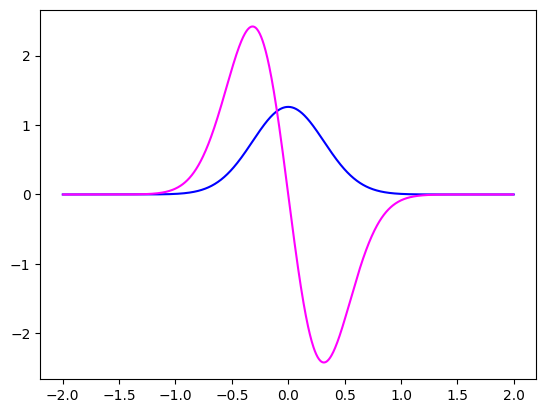

In [4]:
def Diff (x, y):
    n = min (x.shape [0], y.shape [0])
    dx = np.subtract (x [2 : n], x [0 : n - 2])
    dy = np.subtract (y [2 : n], y [0 : n - 2])
    return x [1 : n - 1], np.divide (dy, dx)

dx, dy = Diff (x, y2)

pl.plot (x, y2, color = 'blue')
pl.plot (dx, dy, color = 'magenta')
pl.show()

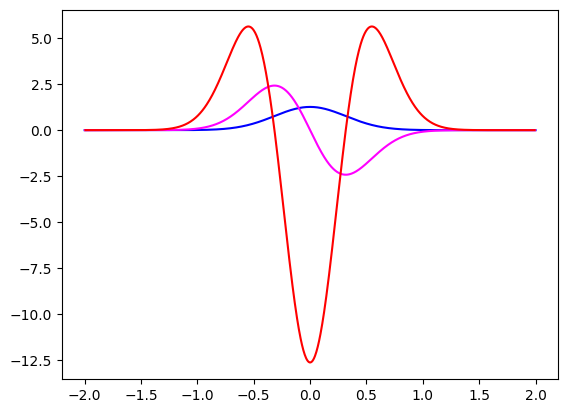

In [5]:
ddx, ddy = Diff (dx, dy)

pl.plot (x, y2, color = 'blue')
pl.plot (dx, dy, color = 'magenta')
pl.plot (ddx, ddy, color = 'red')

## Die zweite Ableitung ist proportional zur Temperaturänderung

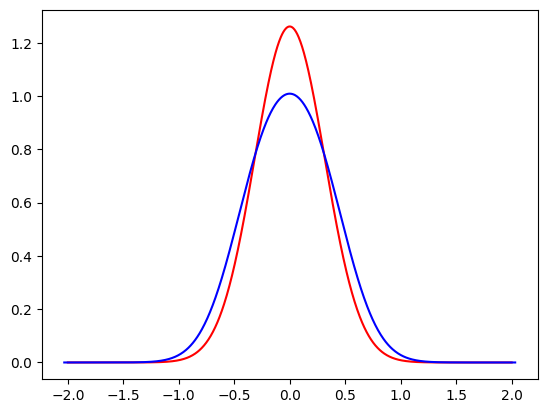

In [6]:
h = 0.02
pl.plot (x, y2, color = 'red')
pl.plot (x [2:-2] + a * h * ddx , y2 [2:-2] + a * h * ddy, color = 'blue')

## Eindimensionales "Testbild"

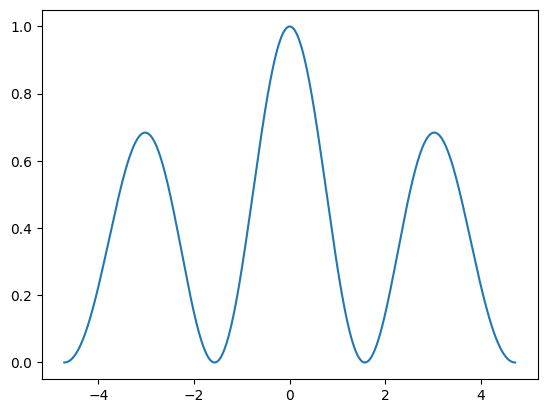

In [7]:
xx = np.linspace (- 1.5 * np.pi, 1.5 * np.pi, 1000)
yy = np.array ([np.exp (- xi ** 2 / 25) * np.cos (xi) ** 2 for xi in xx])

pl.plot (xx, yy)

## Testbild schärfen

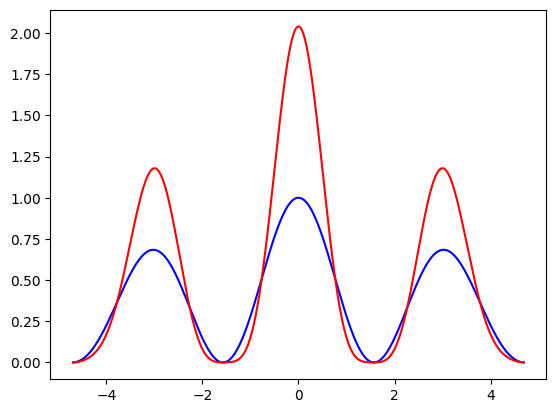

In [8]:
dxx, dyy = Diff (xx, yy)
ddxx, ddyy = Diff (dxx, dyy)

x0 = xx [2:-2]
fb = yy [2:-2]
f0 = np.subtract (fb, 0.5 * np.multiply (ddyy, fb))

pl.plot (x0, fb, color = 'blue')
pl.plot (x0, f0, color = 'red')
pl.show()